# 1. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 2. Definitions

## 2.1. Plot function

In [9]:
def plot(x, labels=0):
    plt.figure(figsize=(5,5))

    plt.plot(x[:, 0], x[:, 1], color='black')
    if labels:
        for i, (x_coord, y_coord) in enumerate(x):
            plt.text(x_coord, y_coord, str(i), color="red", fontsize=15, ha="center", va="center")
    if not labels:
        plt.axis('off')

    plt.axis('equal')
    plt.show()

## 2.2. Starting shapes

In [10]:
hilbert_mods = {
    'classic': np.array([
        [0, 0],
        [0, 1],
        [1, 1],
        [1, 0]
    ]),
    'pentagon': np.array([
        [0.2, 0],
        [0, 0.7],
        [0.5, 1],
        [1, 0.7],
        [0.8, 0]
    ]),
    'octagon': np.array([
        [0.2, 0],
        [0, 0.3],
        [0, 0.7],
        [0.2, 1],
        [0.8, 1],
        [1, 0.7],
        [1, 0.3],
        [0.8, 0]
    ]),
    'star': np.array([
        [0.2, 0. ],
        [0.3, 0.4],
        [0,  0.6],
        [0.4, 0.6],
        [0.5, 1],
        [0.6 ,0.6],
        [1, 0.6],
        [0.7, 0.4],
        [0.8, 0 ]]),
    'triangle': np.array([
        [0, 0],
        [0.5, 1],
        [1, 0]
    ]), 
    'hexagon': np.array([
        [0.2, 0],
        [0, 0.5],
        [0.2, 1],
        [0.8, 1],
        [1, 0.5],
        [0.8, 0]
    ])
}

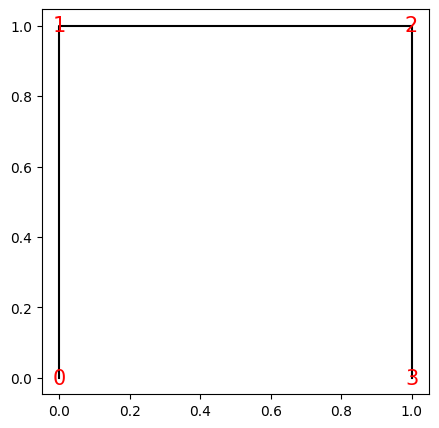

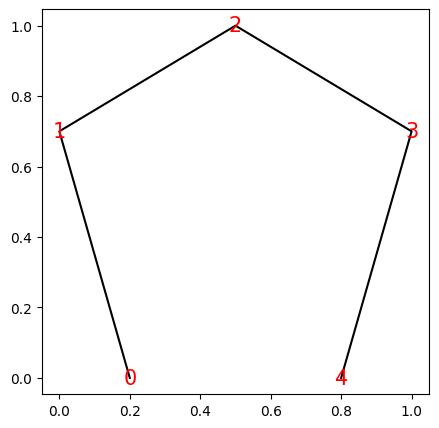

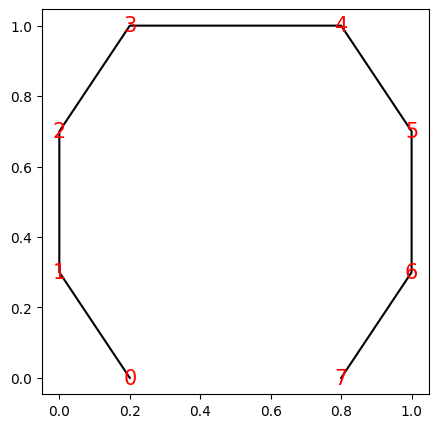

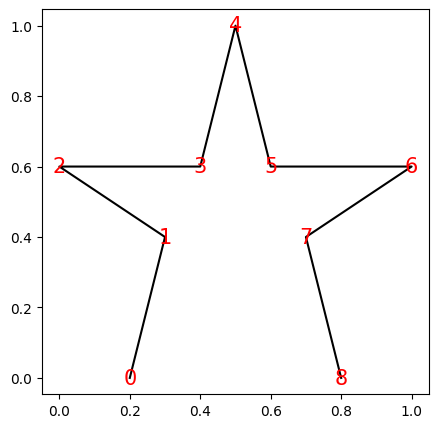

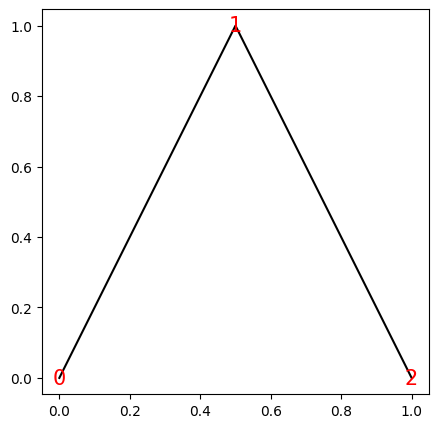

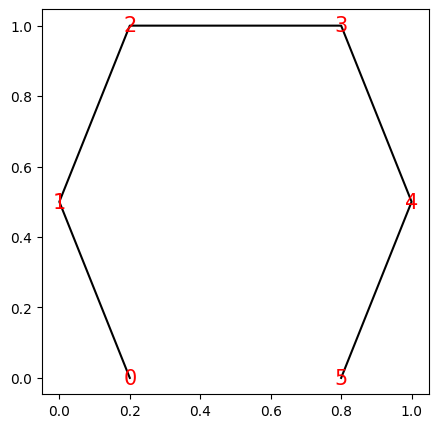

In [12]:
for name, mod in hilbert_mods.items():
    plot(mod, labels=1)


## 2.3. Rotation

In [13]:
def rotate_left(x):
    # performs something like transposition of the curve
    # rotates the curve 90 degrees counterclockwise, flips its order and translates it to the origin
    x0 = x[-1] # point, which relative to others position will be preserved
    x = x @ np.array(
        [
            [0, 1],
            [-1, 0]
        ] # rotation matrix
    )
    x = np.flip(x, axis=0)
    d = -x[-1] + x0 # translation vector
    x += d
    return x

def rotate_right(x):
    # performs something like transposition of the curve along its antidiagonal
    # rotates the curve 90 degrees clockwise, flips its order and translates it to the origin
    x0 = x[0] # point, which relative to others position will be preserved
    x = x @ np.array(
        [
            [0, -1],
            [1, 0]
        ] # rotation matrix
    )
    x = np.flip(x, axis=0)
    d = -x[0] + x0 # translation vector
    x += d
    return x

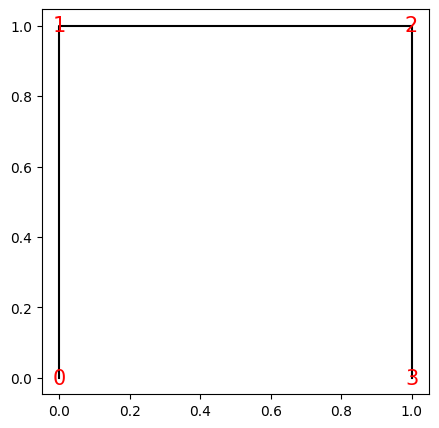

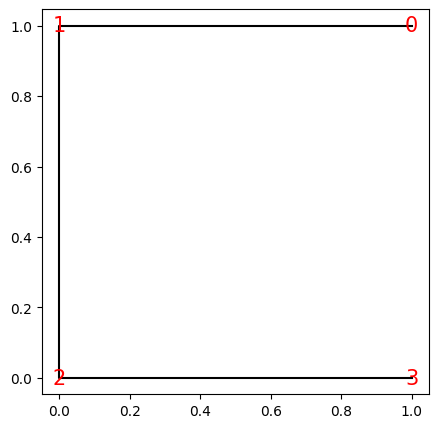

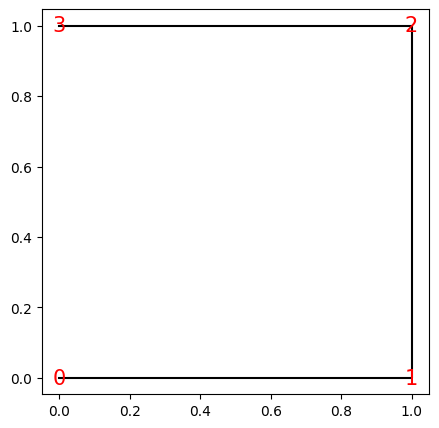

In [14]:
# how it works
plot(hilbert_mods['classic'], labels=1)
plot(rotate_left(hilbert_mods['classic']), labels=1)
plot(rotate_right(hilbert_mods['classic']), labels=1)

## 2.4. Generate curve

In [15]:
def hilbert(order=1, x0=0, y0=0, length=1/2, mod='classic'):
    if order == 1:
        # base case, starting shape shifted and scaled
        return hilbert_mods[mod] * length + np.array([x0, y0])
    # recursive case, divides the space into 4 parts
    # each of them is filled with a curve of order - 1
    p1 = hilbert(order - 1, length= length / 2, x0=x0, y0=y0, mod=mod)
    p2 = hilbert(order - 1,length= length / 2, x0=x0, y0=y0+length, mod=mod)
    p3 = hilbert(order - 1, length= length / 2, x0=x0+length, y0=y0+length, mod=mod)
    p4 = hilbert(order - 1, length= length / 2, x0=x0+length, y0=y0, mod=mod)
    # rotates the subcurves, so that they are connected
    p1 = rotate_right(p1)
    p4 = rotate_left(p4)
    return np.vstack([p1, p2, p3, p4])

def hilbert_3x3(order=1, x0=0, y0=0, length=1/2, mod='classic'):
    # instead of dividing the space into 4 parts, divides it into 9
    if order == 1:
        return hilbert_mods[mod] * length + np.array([x0, y0])
    n_length = length / 3
    n_order = order - 1
    p1 = hilbert_3x3(n_order, length= n_length, x0=x0, y0=y0, mod=mod)
    p2 = hilbert_3x3(n_order,length= n_length, x0=x0, y0=y0+2*n_length, mod=mod)
    p3 = hilbert_3x3(n_order, length= n_length, x0=x0, y0=y0+2*2*n_length, mod=mod)
    p4 = hilbert_3x3(n_order, length= n_length, x0=x0+2*n_length, y0=y0+2*2*n_length, mod=mod)
    p5 = hilbert_3x3(n_order, length= n_length, x0=x0+2*2*n_length, y0=y0+2*2*n_length, mod=mod)
    p6 = hilbert_3x3(n_order, length= n_length, x0=x0+2*2*n_length, y0=y0+2*n_length, mod=mod)
    p7 = hilbert_3x3(n_order, length= n_length, x0=x0+2*2*n_length, y0=y0, mod=mod)

    p1 = rotate_right(p1)
    p2 = rotate_right(p2)

    p6 = rotate_left(p6)
    p7 = rotate_left(p7)
    return np.vstack([p1, p2, p3, p4, p5, p6, p7])

# 3. Examples

## 3.1. Classic hilbert curve with different stariting shapes

mod: classic


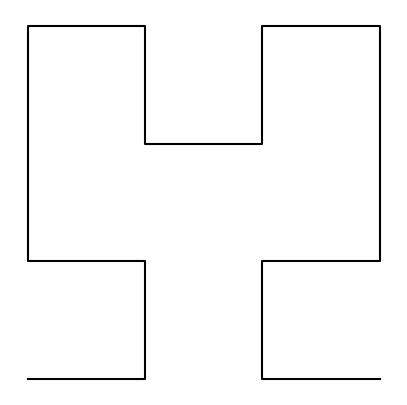

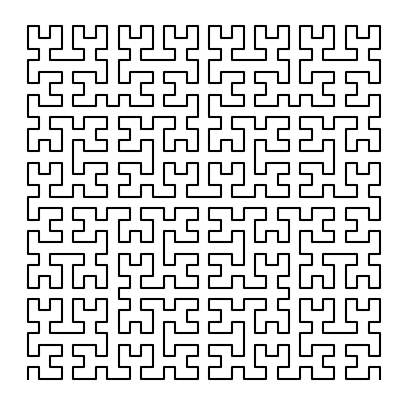

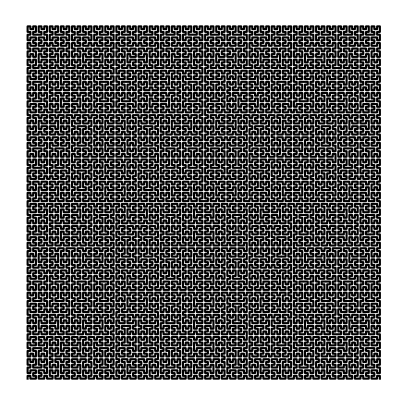

mod: pentagon


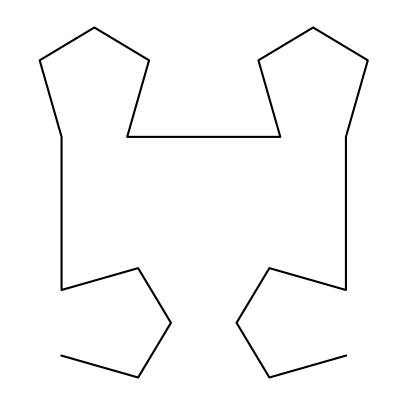

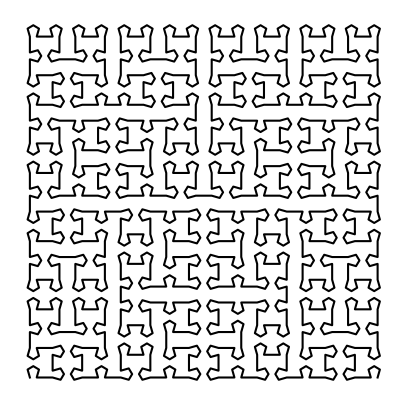

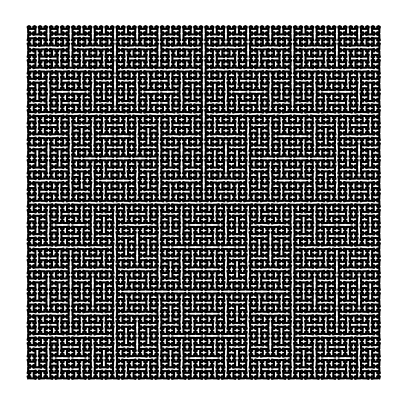

mod: octagon


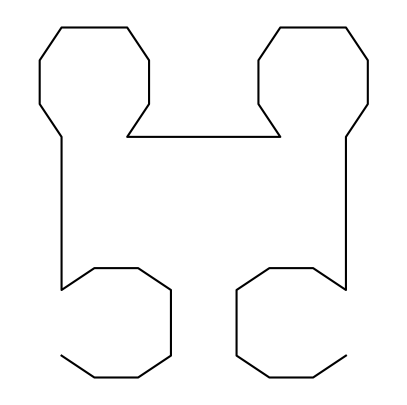

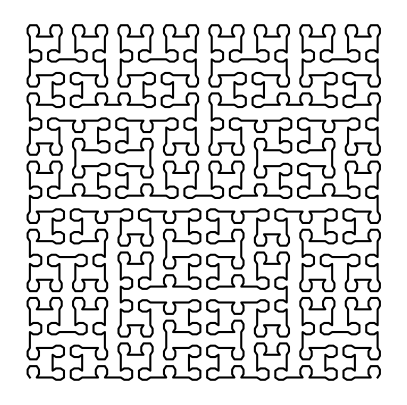

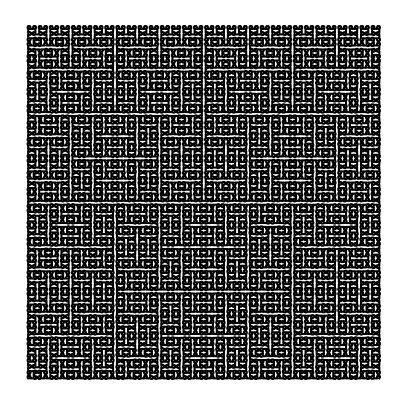

mod: star


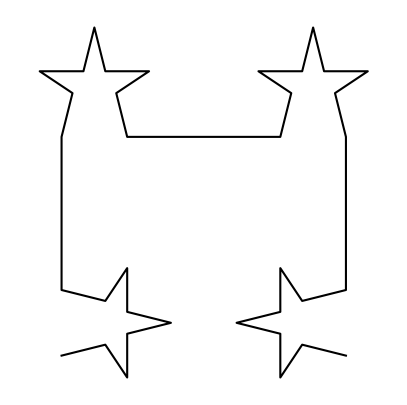

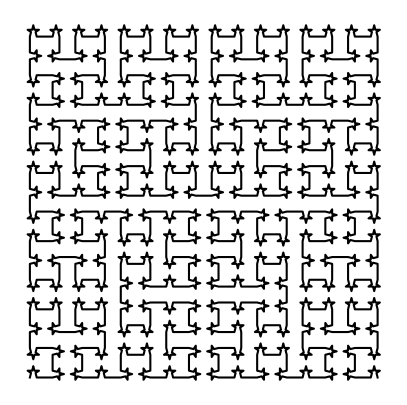

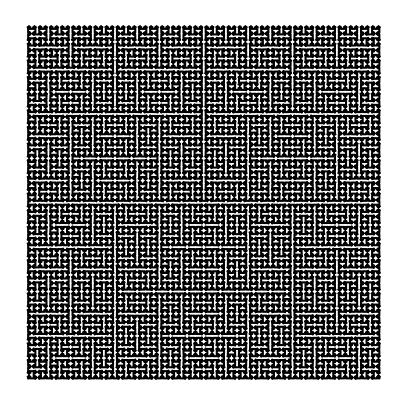

mod: triangle


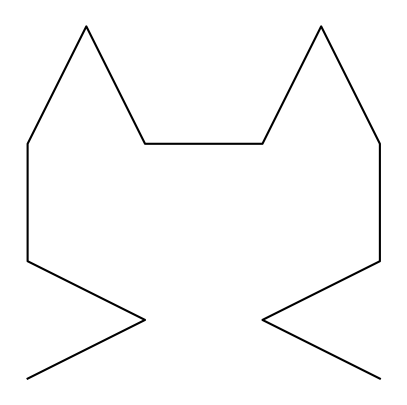

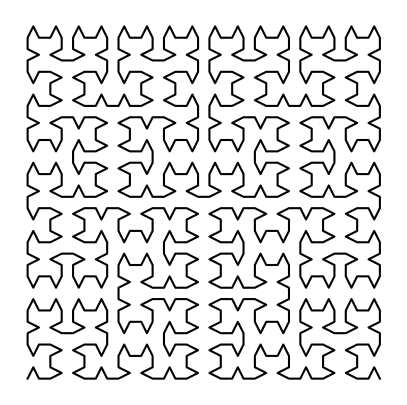

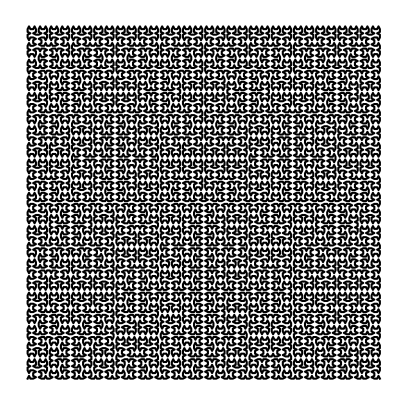

mod: hexagon


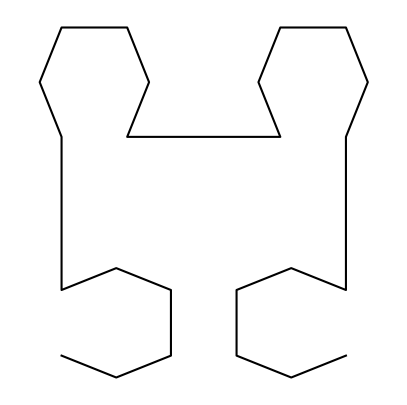

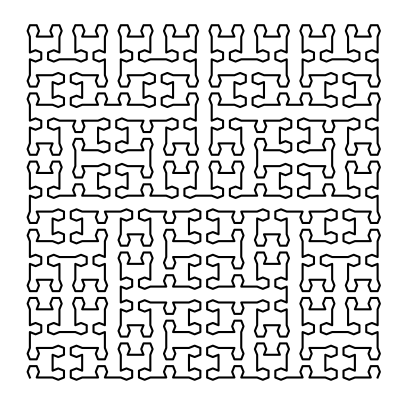

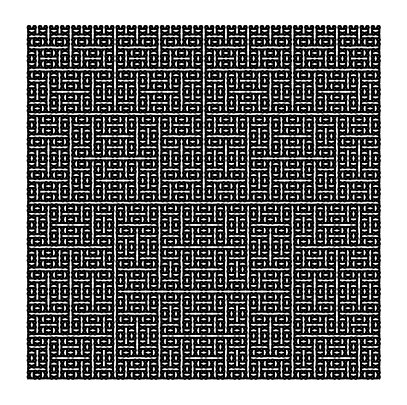

In [17]:
for mod in hilbert_mods:
    print(f'mod: {mod}')
    for i in [2, 5, 7]:
        x = hilbert(i, mod=mod)
        plot(x, labels=0)

## 3.2. 3x3 hilbert curve

mod: classic


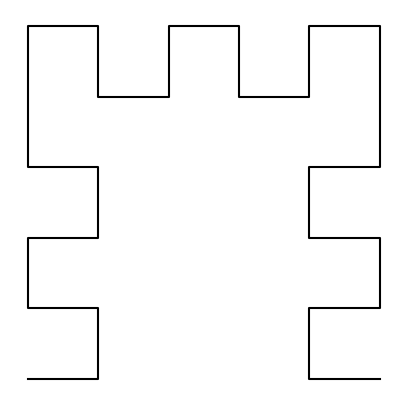

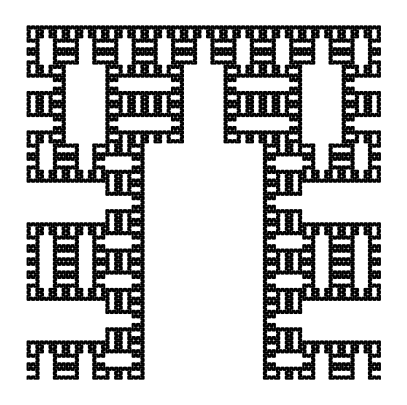

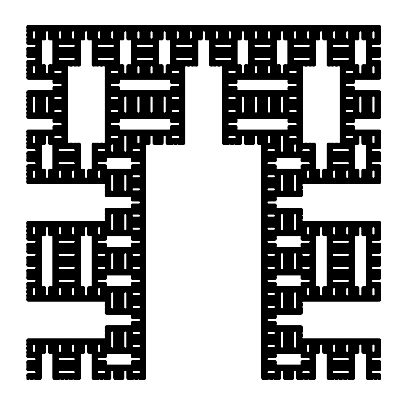

mod: pentagon


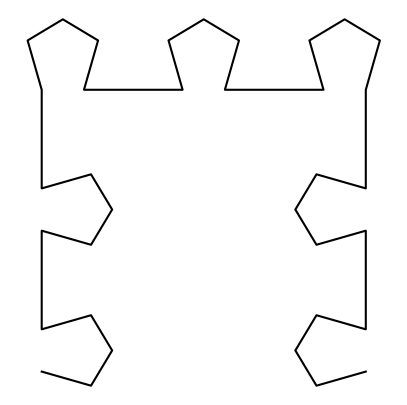

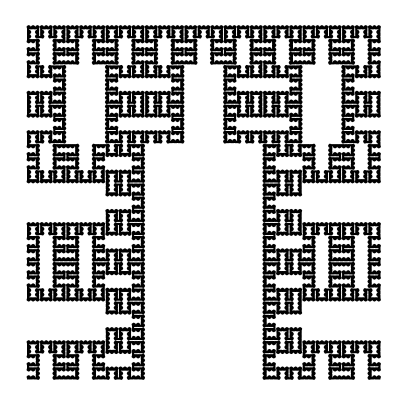

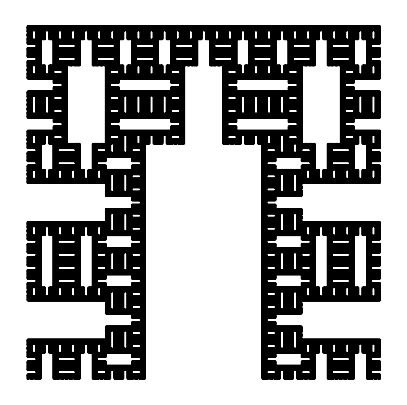

mod: octagon


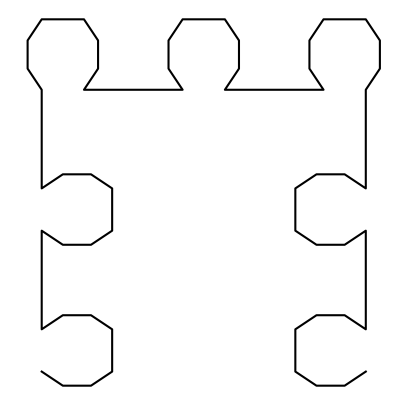

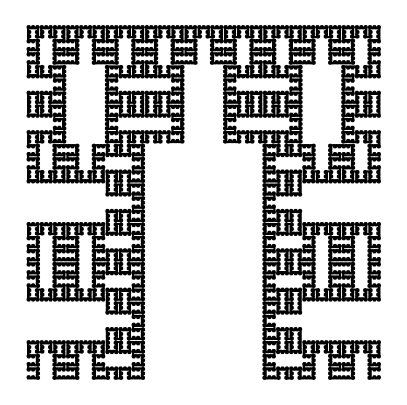

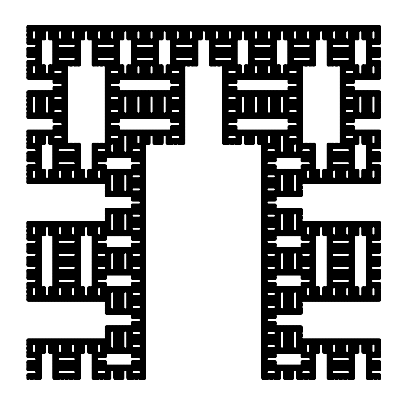

mod: star


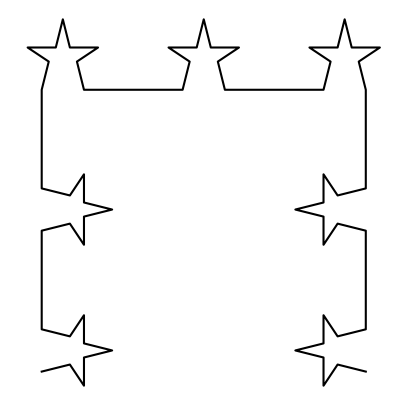

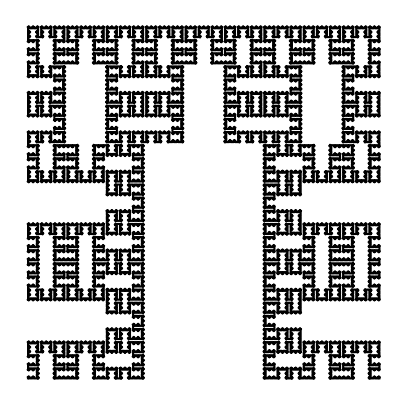

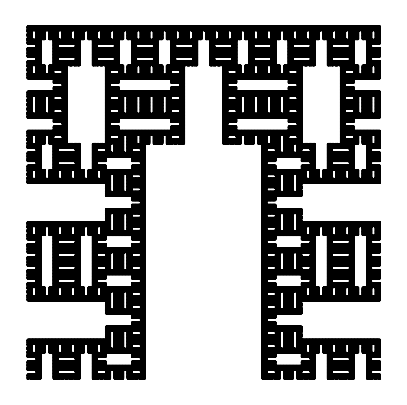

mod: triangle


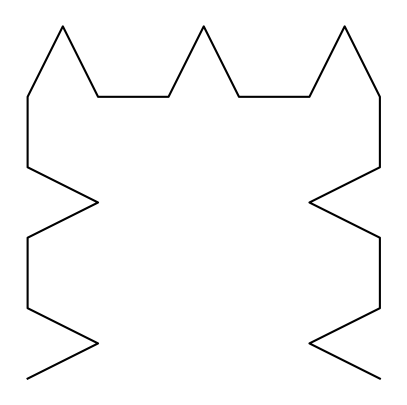

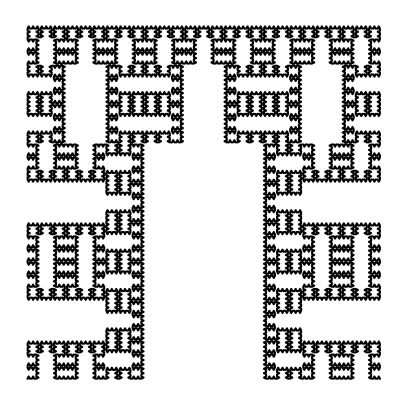

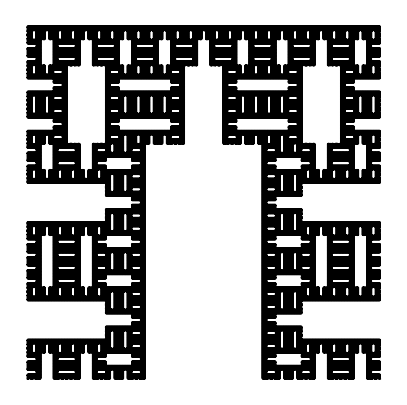

mod: hexagon


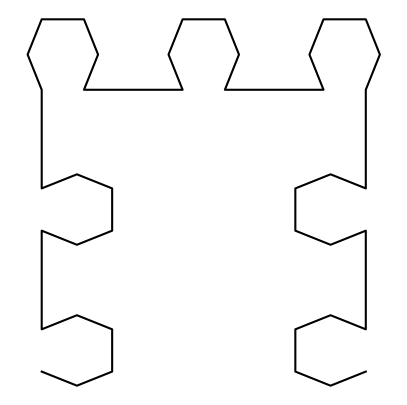

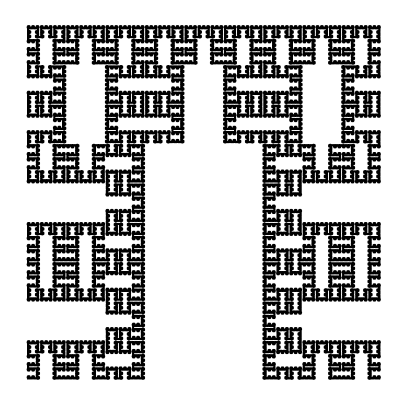

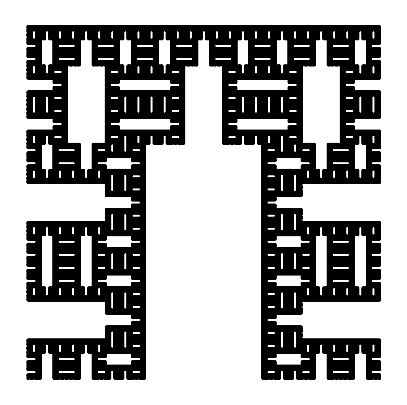

In [18]:
for mod in hilbert_mods:
    print(f'mod: {mod}')
    for i in [2, 5, 7]:
        x = hilbert_3x3(i, mod=mod)
        plot(x, labels=0)

# 4. Report

## 4.1. Opis teoretyczny

### 4.1.1.  Historia
Krzywa Hilberta to przykład krzywej przestrzennie wypełniającej, opracowanej przez niemieckiego matematyka Davida Hilberta w 1891 roku. Jest ona inspirowana wcześniejszą pracą włoskiego matematyka Giuseppe Peano, który w 1890 roku zaprezentował pierwszą krzywą przestrzennie wypełniającą, dziś znaną jako krzywa Peano. Krzywa Hilberta stanowiła rozwinięcie i modyfikację pierwotnej idei Peano, przedstawiając bardziej uporządkowany i symetryczny wzór, który stał się popularnym przykładem konstrukcji fraktalnych.

### 4.1.2. Konstrukcja
Technicznie, opisywana poniżej konstrukcja dotyczy jedynie pseudo-krzywej Hilberta, skończonego rzędu $ n $ (czyli określonej liczby iteracji). Prawdziwa krzywa Hilberta powstaje dopiero w granicy, gdy  $n \to \infty$ . Tylko wtedy staje się ona w pełni krzywą przestrzennie wypełniającą, odwiedzającą każdy punkt kwadratu jednostkowego.
#### 4.1.2.1.  Rekurencja
Rekurencyjna konstrukcja krzywej Hilberta rzędu $n$ polega na dzieleniu przestrzeni (wyjściowo kwadratu jednostkowego) na cztery równe kwadraty oraz wypełnieniu ich krzywymi rzędu $n-1$. W dolnych kwadratach należy ponadto "przetransponować" krzywe - w lewym względem antydiagonali, zaś w prawym względem głównej diagonali. "Transpozycja" polega na obróceniu krzywej o $90^\circ$ w odpowiednią stronę, odwróceniu kolejności punktów oraz przesunięciu krzywej do wyjściowego obszaru. Obrót osiągnąć można mnożąc punkty przez [macierz obrotu](https://pl.wikipedia.org/wiki/Macierz_obrotu), zmiana kolejności to przepisanie tablicy od tyłu. W przypadku obrotu względem głównej diagonali łatwo dostępnym punktem pozostającym w tym samym relatywnym położeniu jest ostatni punkt (prawy dolny róg), zaś w drugim przypadku jest to pierwszy punkt (lewy dolny róg). Zapamiętując pozycję odpowiedniego z tych punktów i porównując z jego nową pozycją można otrzymać wektor przesunięcia potrzebny do umieszczenia krzywej w tym samym obszarze. <br>
Rekurencja kończy się, gdy rząd dojdzie do 1. Wówczas krzywa Hilberta jest w kształcie kwadratowej, odwróconej liery "U".
#### 4.1.2.2. [L-system](https://en.wikipedia.org/wiki/L-system)

Są one używane do opisu wielu obiektów o samopowtarzalnej strukturze, w szczególności fraktali.

Krótko mówiąc, system L (lub L-system) składa się z:
- **alfabetu** — zmiennych, które są podstawiane zgodnie z regułami produkcji,
- **stałych** — stałych wartości,
- **aksjomatu** — punktu początkowego,
- **reguł produkcji** — określających, w jaki sposób zmienne są przekształcane (w co).

W szczególności dla krzywej Hilberta:
- **Alfabet**: A, B
- **Stałe**: F, +, −
- **Aksjomat**: A
- **Reguły produkcji**:
  - A → +BF−AFA−FB+
  - B → −AF+BFB+FA−

Jak to interpretujemy?
- „F” oznacza „rysuj do przodu”
- „-” oznacza „skręć w lewo o 90°”
- „+” oznacza „skręć w prawo o 90°”
- A, B podczas wizualizacji są ignorowane

### 4.1.3. Zastosowania

Krzywa Hilberta jest ceniona za zdolność do mapowania dwuwymiarowej przestrzeni na jednowymiarową linię, przy jednoczesnym zachowaniu lokalnych sąsiedztw punktów, to znaczy, punkty położone blisko siebie w dwuwymiarowej przestrzeni odwzorowywane są na punkty położone blisko siebie na jednowymiarowej przestrzeni. Dzięki tej właściwości może być stosowana w miejscach, gdzie wymagana jest jednowymiarowa reprezentacja przestrzennych danych, takich jak obrazy, dane geograficzne czy struktury biologiczne. Uporządkowanie danych wzdłuż krzywej Hilberta pozwala na optymalizację dostępu do danych, ułatwia wizualizację dużych zbiorów danych oraz wspomaga kompresję, minimalizując zakłócenia wynikające z rozdzielenia sąsiadujących danych punktów w ich jednowymiarowej reprezentacji


### 4.1.4. Modyfikacje
Klasyczna postać krzywej Hilberta została zmodyfikowana na dwa sposoby:
- poza wyjściowym kształtem kwadratowym jest też trójkąt, gwiazda, pięciokąt, sześciokąt i ośmiokąt
- dzielenie przestrzeni na 4 części zamienić można na 9 części, wypełniając wszystkie poza środkową oraz dolnośrodkową

## 4.2. Analiza i wnioski
### 4.2.1. Porównanie fraktala klasycznego z jego modyfikacją
W przypadku jedynie zmiany kształtu początkowego zmiany zauważalne są jedynie w krzywych niskiego rzędu, zaś gdy $n \to \infty$ wszystkie warianty wypełniają cały kwadrat jednostkowy i zachowują się bardzo podobnie. <br>
Zmiana podziału przestrzeni z 4 na 9 części powoduje istotne różnice w zachowaniu krzywej. Fraktal nie wypełnia już całej przestrzeni oraz przypomina bardziej dywan Sierpińskiego, niżeli krzywą Hilberta. Z tego względu traci on główne zastosowanie - mapowanie przestrzeni dwuwymiarowej na jednowymiarową, więc pełni raczej funkcję ciekawostki.
### 4.2.2. Proces implementacji
Początkowo napotkane trudności ze zrozumieniem struktury krzywej Hilberta, szczególnie jej rekursywnej konstrukcji, doprowadziły do odkrycia L-systemu — ciekawego narzędzia do generowania fraktali. Dzięki L-systemowi udało się uprościć proces implementacji krzywej Hilberta, co jednocześnie poszerzyło naszą wiedzę na temat technik stosowanych do tworzenia struktur fraktalnych. <br>
W przypadku rekurencyjnej konstrukcji największym wyzwaniem była implementacja "transpozycji" w miejscu. Wstępnym pomysłem było skalowanie i przesuwanie krzywej do kwadratu $[0,1] \times [0, 1]$, wykonywanie obrotu, wyrównywanie do pozycji do kwadratu $[0,1] \times [0, 1]$ oraz ponownego skalowania i przesuwania do wyjściowej pozycji. Proces ten był niepotrzebnie skomplikowany oraz nie uwzględniał potrzebnego odwrócenia kolejności punktów, więc nie była to szukana "transpozycja". Opracowanie skutecznego i wydajnego rozwiązania pozwoliło na uproszczenie generowania krzywej oraz wprowadzania dowolnych modyfikacji. Tworzenie krzywej $3 \times 3$ wymagało więc jedynie zaplanowania ułożenia fragmentów, tak by mogły się połączyć, a sama implementacja nie stanowiła żadnego wyzwania. <br>

